Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.


Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification
Q3. Check for null values, identify categorical variables, and encode them.
Q4. Separate the features and target variables from the dataframe.
Q5. Perform a train-test split and divide the data into training, validation, and test datasets.
Q6. Perform scaling on the dataset.
Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
Q8. Create a Sequential model and add all the layers to it.
Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.
Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
no improvement is observed.
Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
training.
Q12. Print the model summary.
Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
Q14. Compile the model with the specified loss function, optimizer, and metrics.
Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
callbacks.
Q16. Get the model's parameters.
Q17. Store the model's training history as a Pandas DataFrame.
Q18. Plot the model's training history.
Q19. Evaluate the model's performance using the test data.

In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from tensorflow.keras import models, layers
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


2023-06-29 15:41:39.484371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.12.0
Keras version: 2.12.0


In [2]:
df = pd.read_csv('wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,855
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,NaN


there is no catogrical variable

In [5]:
df['quality'] = df['quality'].replace({'good': 1, 'bad': 0})

X = df.drop('quality', axis=1)
y= df.quality

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
y_train = np.array(y_train).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1,1)


from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import datetime

# Create a log directory for TensorBoard
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Create the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64*2, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64/2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val),callbacks=[tensorboard_callback,early_stopping_callback,checkpoint_callback])


model.summary()



Epoch 1/20
10/10 [==============================] - 2s 48ms/step - loss: 0.6600 - accuracy: 0.6231 - val_loss: 0.5955 - val_accuracy: 0.7031
Epoch 2/20
10/10 [==============================] - 0s 20ms/step - loss: 0.5841 - accuracy: 0.7162 - val_loss: 0.5050 - val_accuracy: 0.8125
Epoch 3/20
10/10 [==============================] - 0s 18ms/step - loss: 0.5378 - accuracy: 0.7459 - val_loss: 0.4722 - val_accuracy: 0.7812
Epoch 4/20
10/10 [==============================] - 0s 18ms/step - loss: 0.5202 - accuracy: 0.7514 - val_loss: 0.4512 - val_accuracy: 0.7812
Epoch 5/20
10/10 [==============================] - 0s 16ms/step - loss: 0.5052 - accuracy: 0.7553 - val_loss: 0.4464 - val_accuracy: 0.7969
Epoch 6/20
10/10 [==============================] - 0s 18ms/step - loss: 0.4955 - accuracy: 0.7701 - val_loss: 0.4657 - val_accuracy: 0.7812
Epoch 7/20
10/10 [==============================] - 0s 18ms/step - loss: 0.4935 - accuracy: 0.7623 - val_loss: 0.4455 - val_accuracy: 0.7969
Epoch 8/20
10

In [8]:
model_params = model.get_weights()

for layer_weights in model_params:
    print(layer_weights.shape)  # Print the shape of the layer's weights



(11, 64)
(64,)
(64, 64)
(64,)
(64, 128)
(128,)
(128, 64)
(64,)
(64, 32)
(32,)
(32, 1)
(1,)


In [9]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.660048,0.623143,0.595459,0.703125
1,0.584066,0.716184,0.505042,0.812500
2,0.537784,0.745895,0.472166,0.781250
3,0.520194,0.751368,0.451193,0.781250
4,0.505176,0.755278,0.446370,0.796875
5,0.495527,0.770133,0.465704,0.781250
6,0.493520,0.762314,0.445503,0.796875
7,0.481625,0.777170,0.458058,0.765625
8,0.472939,0.773260,0.421150,0.812500
9,0.457804,0.782643,0.443227,0.812500


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


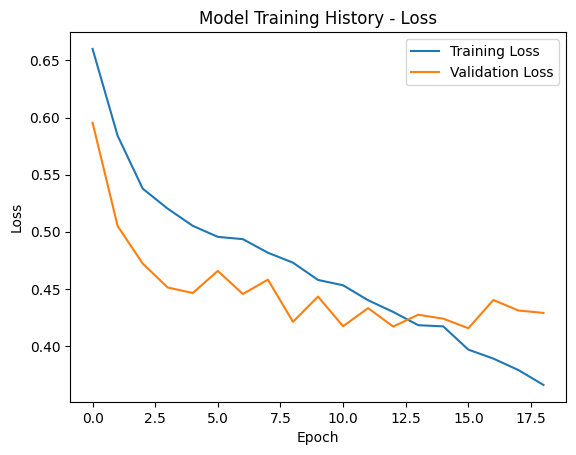

In [11]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training and validation loss
ax.plot(train_loss, label='Training Loss')
ax.plot(val_loss, label='Validation Loss')

# Set the plot title and labels
ax.set_title('Model Training History - Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Add a legend
ax.legend()

# Show the plot
plt.show()


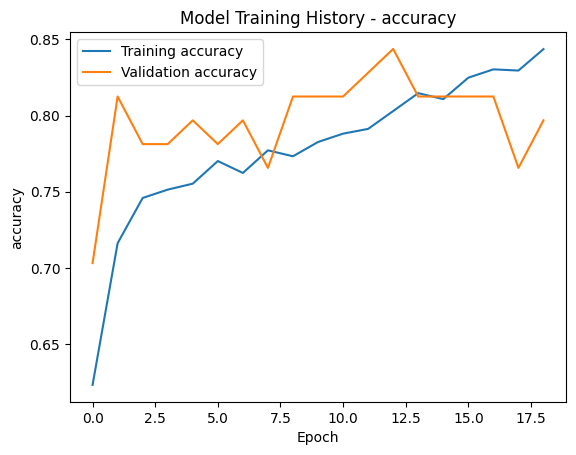

In [12]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training and validation loss
ax.plot(train_loss, label='Training accuracy')
ax.plot(val_loss, label='Validation accuracy')

# Set the plot title and labels
ax.set_title('Model Training History - accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [13]:
# Assuming you have trained the model and now want to evaluate it using the test data

# Load the best model saved by the ModelCheckpoint callback
best_model = models.load_model('best_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


8/8 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7383
Test Loss: 0.5111461281776428
Test Accuracy: 0.73828125
